In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

import os, pandas as pd
import seaborn as sns
import sys

sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation/')
import hts_fitting as hts
import hts_showcase as sc
import hts_fitfunctions as ff

In [3]:
data

(None,
 None,
                                                fpath  temperature         ic  \
 0  slf_ffj54/Ic/degradation/step00/Ic_2025-06-07_...     21.70353  52.166278   
 1  slf_ffj54/Ic/degradation/step00/Ic_2025-06-07_...     21.75003  52.197873   
 2  slf_ffj54/Ic/degradation/step00/Ic_2025-06-07_...     21.73782  52.176495   
 3  slf_ffj54/Ic/degradation/step00/Ic_2025-06-07_...     21.81168  52.239310   
 4  slf_ffj54/Ic/degradation/step00/Ic_2025-06-07_...     21.81616  52.077178   
 
            n      timeends temperature_group  
 0  40.363062  1.749269e+09      [21.7, 21.9)  
 1  40.686214  1.749269e+09      [21.7, 21.9)  
 2  40.346147  1.749270e+09      [21.7, 21.9)  
 3  41.451434  1.749270e+09      [21.7, 21.9)  
 4  40.099733  1.749270e+09      [21.7, 21.9)  ,
 [],
 [])

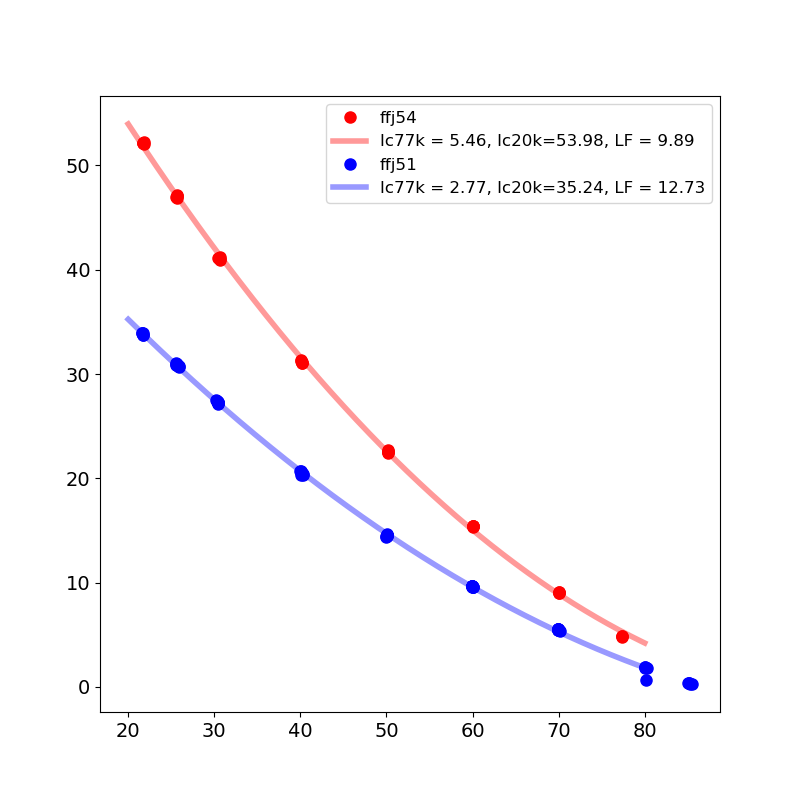

In [14]:
from scipy.optimize import curve_fit
paths = [
    'slf_ffj54/Ic/infield/step00/no magnet/',
    'ext_ffj51/Ic/infield/step00/no magnet/'
]

fig, ax = plt.subplots()
for path, c, l in zip(paths, ['r', 'b'], ['ffj54', 'ffj51']):
    data = hts.getIcT([path+f for f in np.sort(os.listdir(path)) if 'Ic_' in f])[2]
    ax.plot(data.temperature, data.ic, marker='o', linestyle='None', label=l, color=c)
    popt, pcov = curve_fit(ff.quadratic, data.temperature, data.ic)
    
    xsmooth = np.linspace(20, 80, 1000)
    ysmooth = ff.quadratic(xsmooth, *popt)
    ic20k = ysmooth[np.argmin(np.abs((xsmooth-20)))]
    ic77k = ysmooth[np.argmin(np.abs((xsmooth-77)))]
    lf = ic20k/ic77k
    ax.plot(xsmooth, ysmooth, linewidth=4, alpha=.4, color=c, label='Ic77k = {:4.2f}, Ic20k={:4.2f}, LF = {:4.2f}'.format(ic77k, ic20k, lf))
    
ax.legend()